## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# To read the file.
path ='/content/drive/MyDrive/Colab Notebooks/Capstone_Project/Hotel_Booking_Analysis/Copy of Copy of Hotel Bookings.csv'
hotel_data_raw = pd.read_csv(path)

# Data Exploration And Data Cleaning


In [ ]:
hotel_data_raw.head() # To display the first five rows of the dataframe by default.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_data_raw.tail() # To display the last five rows of the dataframe by default.

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# To view statistical details like percentile, mean, std etc.
hotel_data_raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
hotel_data_raw.info() # To get the information about the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            


The given dataset has nearly 119390 observations with 32 variables which are mix of float type (4), integer type (16) and object type (12) including some missing values and duplicates that effect the dataset. let's clean the data.


In [ ]:
# To find the duplicates.
hotel_data_raw.duplicated().value_counts()
# False - No duplicates. 
# True  - Duplicates.

False    87396
True     31994
dtype: int64

In [ ]:
# To drop 31994 duplicates.
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw.duplicated().value_counts())
hotel_data_raw = hotel_data_raw.drop_duplicates()


It is impossible that entering the hotel with no guests. Hence index of addtion of adults and babies is equal to zero is dropped. Meanwhile children column is not considered or not converted into integer type as it is found that all the entries are zero by analysing children column.



In [ ]:
hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies) == 0].shape 

(382, 32)

In [ ]:
hotel_data_raw = hotel_data_raw.drop(hotel_data_raw[(hotel_data_raw.adults + hotel_data_raw.babies) == 0].index)

In [ ]:
# To find the null values
hotel_data_raw.isnull().sum().sort_values(ascending = False)

company                           81777
agent                             12124
country                             447
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# replaces the NULL values with specified values
hotel_data_raw['company'].fillna(0.0,inplace=True)
hotel_data_raw['agent'].fillna(0.0,inplace=True)
hotel_data_raw['country'].fillna('other',inplace=True)
hotel_data_raw['children'].fillna(0.0,inplace=True)

In [ ]:
hotel_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87012 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87012 non-null  object 
 1   is_canceled                     87012 non-null  int64  
 2   lead_time                       87012 non-null  int64  
 3   arrival_date_year               87012 non-null  int64  
 4   arrival_date_month              87012 non-null  object 
 5   arrival_date_week_number        87012 non-null  int64  
 6   arrival_date_day_of_month       87012 non-null  int64  
 7   stays_in_weekend_nights         87012 non-null  int64  
 8   stays_in_week_nights            87012 non-null  int64  
 9   adults                          87012 non-null  int64  
 10  children                        87012 non-null  float64
 11  babies                          87012 non-null  int64  
 12  meal                           

Updated dataset has nearly 87012 observations with 32 variables. It is a mix of numerical and categorial variables. By basic inspection, it is found that hotel, arrival_date_months, meal, market_segment, distribution channel, deposit_type etc are categorical varibles. Some are the reason behind are shown below,

*  hotel - two types (Resort hotel and City hotel) List item
*  meal





# *   Percentages of bookings have been cancelled and not cancelled month wise
# *   The best time to book a hotel room



In [ ]:
# To check the counts of canceled and not canceled bookings
hotel_data_raw['is_canceled'].value_counts()

0    63083
1    23929
Name: is_canceled, dtype: int64

is_canceled variable takes binary values o and 1


*   o indicates bookings not canceled
*   1 indicates bookings canceled



In [ ]:
hotel_data_raw['arrival_date_month'].value_counts()

August       11210
July         10011
May           8329
April         7878
June          7746
March         7473
October       6905
September     6671
February      6065
December      5091
November      4967
January       4666
Name: arrival_date_month, dtype: int64

In [ ]:
# hotel_d= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1,'arrival_date_month'].value_counts()
# To get the normalize
canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1,'arrival_date_month'].value_counts(normalize = 'index')*100
canceled_df = pd.DataFrame(canceled_df)

Text(0, 0.5, 'is_cancelled (%)')

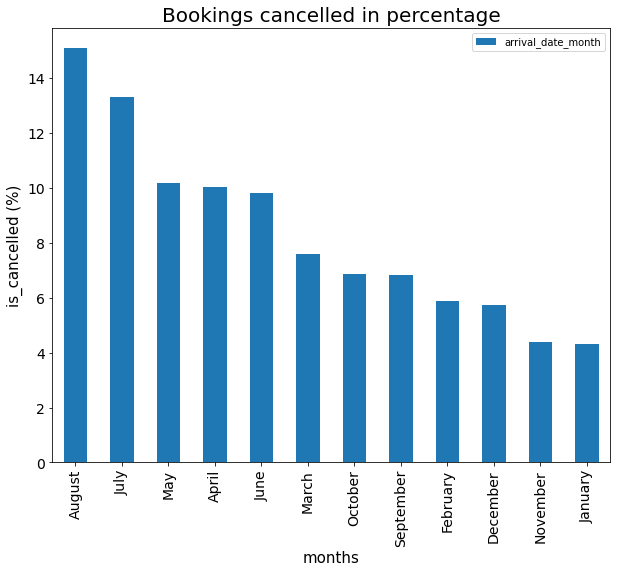

In [ ]:
# bar chart months v/s is_cancelled(%)
ax = canceled_df.plot.bar(figsize = (10,8),fontsize =14)
ax.set_title('Bookings cancelled in percentage',fontsize = 20)
ax.set_xlabel("months",fontsize = 15)
ax.set_ylabel("is_cancelled (%)",fontsize =15)

In [ ]:
not_canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==0,'arrival_date_month'].value_counts(normalize = 'index')*100
not_canceled_df = pd.DataFrame(not_canceled_df)
not_canceled_df

,arrival_date_month
August,12.046035
July,10.817494
May,9.343246
March,8.962795
April,8.686968
June,8.553810
October,8.346147
September,7.984719
February,7.385508
November,6.214035


Text(0, 0.5, 'is_not_cancelled (%)')

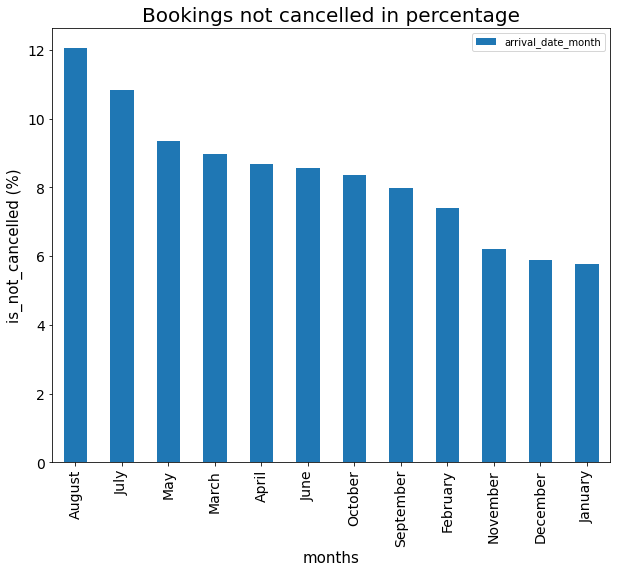

In [ ]:
# bar chart months v/s is_not_cancelled(%)
ax = not_canceled_df.plot.bar(figsize = (10,8),fontsize =14)
ax.set_title('Bookings not cancelled in percentage',fontsize = 20)
ax.set_xlabel("months",fontsize = 15)
ax.set_ylabel("is_not_cancelled (%)",fontsize =15)

 

*   15.09% bookings have been cancelled in augest month which is maximun among all months
*   12.04 bookings have not been cancelled in augest month which is maximum among all months.

As a result, most hotel rooms are booked in augest month which is the best time of year to book a hotel room.



# 02)	Which type of hotels are mostly booked in weekend nights?

In [ ]:
#To compute a simple cross tabulation of hotel and stays_in_weekend_nights.
pd.crosstab(index=hotel_data_raw['hotel'], columns=hotel_data_raw['stays_in_weekend_nights'])

stays_in_weekend_nights,0,1,2,3,4,5,6,7,8,9,10,12,13,14,16,18,19
hotel,,,,,,,,,,,,,,,,,
City Hotel,23076,15112,14194,294,268,40,38,6,22,4,2,0,0,1,0,0,0
Resort Hotel,11897,7484,12101,848,1457,28,74,9,36,5,5,5,2,0,2,1,1


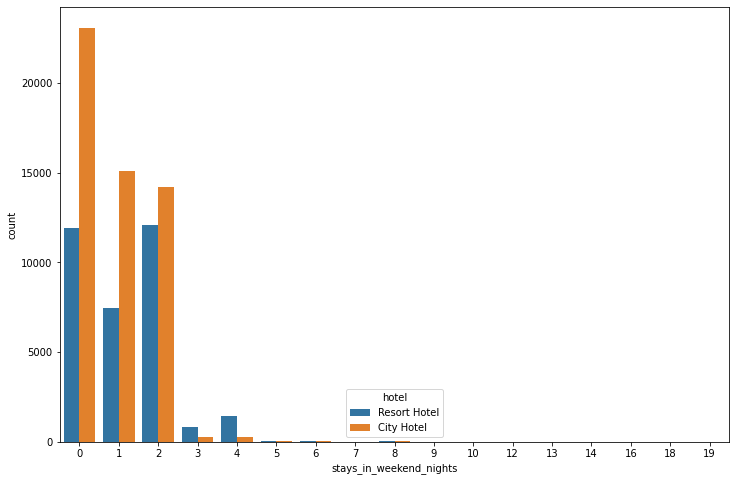

In [ ]:
# grouped by bar chart.
plt.rcParams['figure.figsize']=(12,8)
sns.countplot(x='stays_in_weekend_nights',data=hotel_data_raw, hue= 'hotel')

City hotels are mostly booked in weekend nights.

# 03)	Which type of hotel get maximum number of cancellation of bookings?

In [ ]:
hotel_data_raw['is_canceled'].value_counts()

0    63083
1    23929
Name: is_canceled, dtype: int64

In [ ]:
canceled_df= hotel_data_raw.loc[hotel_data_raw['is_canceled']==1]
canceled_df = pd.DataFrame(canceled_df)

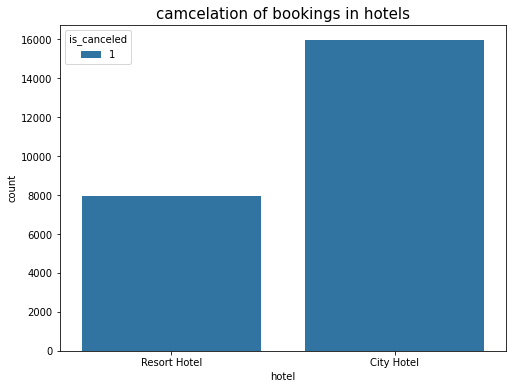

In [ ]:
fig = plt.gcf() # gcf - greatest commom factor to adjust the figsize well.
fig.set_size_inches(8, 6) 
plt.title("camcelation of bookings in hotels", fontsize = 15) 
sns.countplot(x='hotel', data=canceled_df, hue ='is_canceled')

City Hotel has maximum number of cancellation of bookings as compared to Resort Hotel.

## 04)	Which type of hotels have maximum repeated guests?

In [ ]:
hotel_data_raw['is_repeated_guest'].value_counts()
# 0 - not repeated guest.
# 1 - repeated guest.

In [ ]:
repeated_guest= hotel_data_raw.loc[hotel_data_raw['is_repeated_guest']==1,'hotel'].value_counts(normalize = True)*100
repeated_guest = pd.DataFrame(repeated_guest,columns = ['hotel'])
repeated_guest

Text(0, 0.5, 'Repeated_Guest (%)')

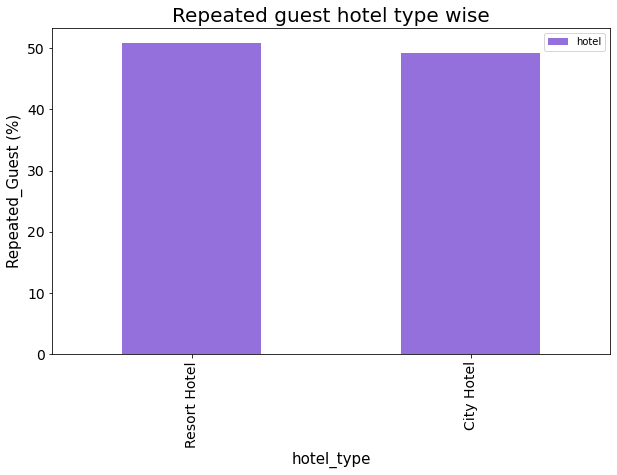

In [ ]:
ax = repeated_guest.plot.bar(color = ['mediumpurple'],figsize = (10,6),fontsize =14)
ax.set_title('Repeated guest hotel type wise',fontsize = 20)
ax.set_xlabel('hotel_type',fontsize=15)
ax.set_ylabel('repeated_guest (%)',fontsize=15)

Conclusion: Resort hotel type has maximum repeated guest as compared to city hotel.

# 04)	Bookings trend of hotels (city hotel and resort hotel) month wise.

In [ ]:
# To make the order monthwise
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September','October', 'November', 'December']
df_not_canceled = hotel_data_raw[hotel_data_raw['is_canceled'] == 0]
# df_not_canceled
sorted_months = df_not_canceled['arrival_date_month'].value_counts().reindex(new_order)
#sorted_months = df_not_canceled['arrival_date_month'].value_counts()
sorted_months

January      3633
February     4659
March        5654
April        5480
May          5894
June         5396
July         6824
August       7599
September    5037
October      5265
November     3920
December     3722
Name: arrival_date_month, dtype: int64

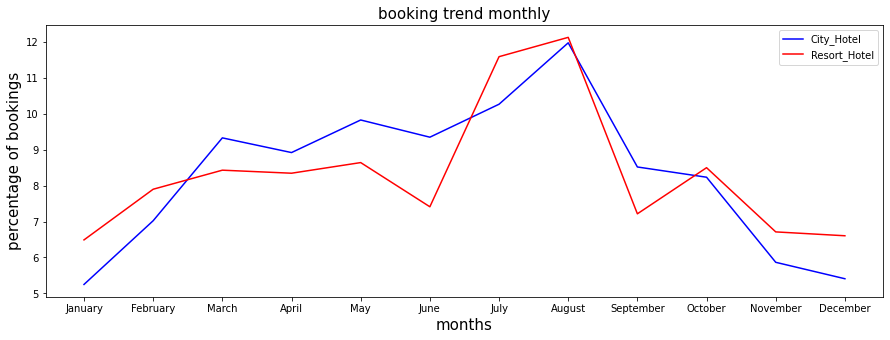

In [ ]:
#select only city hotel
sorted_months_1 = df_not_canceled.loc[hotel_data_raw.hotel=='City Hotel','arrival_date_month'].value_counts().reindex(new_order)
# select only Resort hotel
sorted_months_2 = df_not_canceled.loc[hotel_data_raw.hotel=='Resort Hotel','arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months_1.index
y = sorted_months_1/sorted_months_1.sum()*100

w = sorted_months_2.index
z = sorted_months_2/sorted_months_2.sum()*100

plt.plot(x,y, label='City_Hotel', color='blue')
plt.plot(w,z, label='Resort_Hotel', color='red')
plt.legend()
plt.xlabel("months", fontsize = 15)
plt.ylabel('percentage of bookings', fontsize = 15)
plt.title('booking trend monthly', fontsize=15)
plt.show()
plt.rcParams['figure.figsize']=(15,5)

From the graph, we can say, trend of booking for resort hotel which indicated by red line and city hotel which indicated by blue line is kind of similar with a small difference. for the both hotels, more booking is in augest month followed by july month. In march month, percentage of booking for both hotels is same.

# 05)	Comparison of hotels’ ADR (Average Daily Rate) week wise.

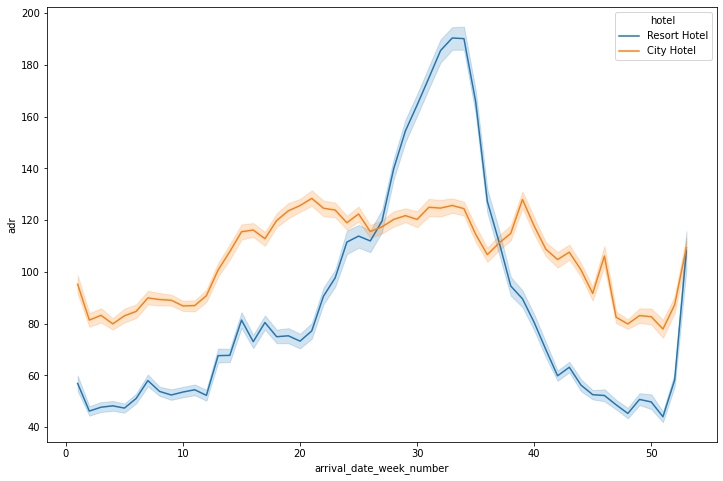

In [ ]:
# lineplot of ADR 
plt.figure(figsize=(12,8))
sns.lineplot(x = 'arrival_date_week_number',y = 'adr', hue='hotel', data=df_not_canceled)

Difference of Adr in both hotel types is high at the starting week of year i.e january month. At the end of week, ADR of both hotel types is same. Avarage Daily Rate (ADR) for the week 28 to 35 (approx) i.e the months of july and August are more for the resort Hotel than city hotel.

# 06)	In which year maximum number of reservation status is checked out?

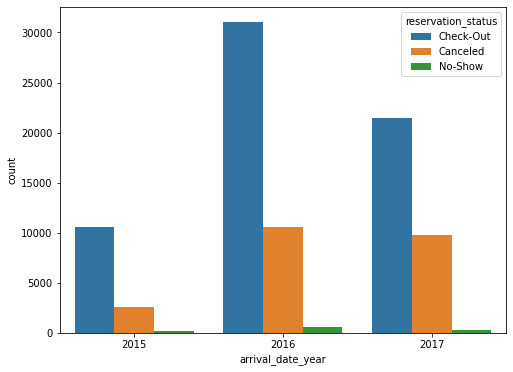

In [ ]:
#
fig = plt.gcf() 
fig.set_size_inches(8, 6) 
sns.countplot(x='arrival_date_year',data=hotel_data_raw, hue= 'reservation_status')


In 2016, maximun number of reseervation_status is checked_out.

# 07)	To find the deposit type of the customers having children.

# 08)	Which is most preferrable meal type for every customer type?

In [ ]:
# hotel_data['meal'].value_counts()  
# hotel_data['customer_type'].value_counts()

In [ ]:
# to make proper dataframe
pd.DataFrame(hotel_data_raw['customer_type'].value_counts(), columns=['customer_type'])

,customer_type
Transient,71726
Transient-Party,11612
Contract,3134
Group,540


In [ ]:
data1 = hotel_data_raw.loc[hotel_data_raw['customer_type']!=0,'meal'].value_counts() # meal

data1 = pd.DataFrame(data1,columns = ['meal'])
data1
data1.index=['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
data1

,meal
Bed and Breakfast,67695
Half Board,9389
Self Catering,9076
Undefined,492
Full Board,360


In [ ]:
df = pd.crosstab(index=hotel_data_raw['customer_type'], columns=hotel_data_raw['meal'])
df

meal,BB,FB,HB,SC,Undefined
customer_type,,,,,
Contract,2359,5,583,173,14
Group,467,1,35,35,2
Transient,55962,264,6422,8860,218
Transient-Party,8907,90,2036,321,258


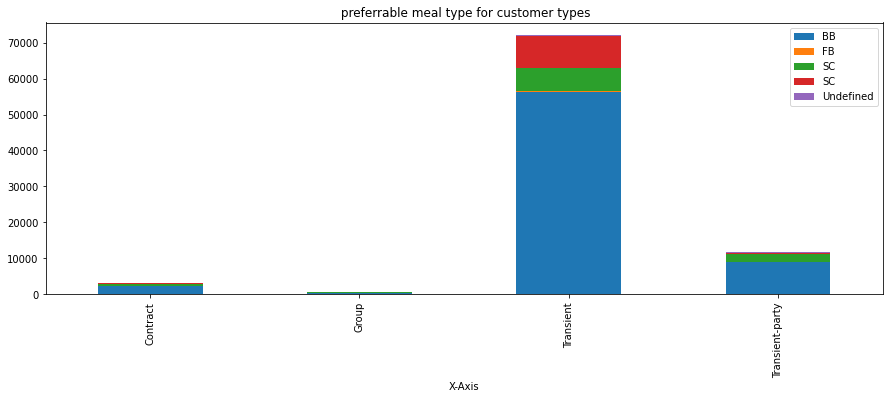

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data_frame = pd.DataFrame([['Contract', 2364, 5, 583, 173,14], ['Group',468,1, 35, 38, 2], ['Transient',56152, 264, 6425, 8927,218],
                   ['Transient-party', 8994, 90, 2042, 343, 258]],
                  columns=['X-Axis', 'BB', 'FB', 'SC', 'SC', 'Undefined'])
data_frame
# stacked bar charts
data_frame.plot(x='X-Axis', kind='bar', stacked=True, title=' preferrable meal type for customer types')


For every customer, BB (Bed and Breakfast) is most preferable meal type.

# 10)	What are the top four countries where the bookings are maximum?

In [ ]:
# confirmed bookings means which are not canceled.
booking_confirmed = hotel_data_raw[hotel_data_raw['is_canceled']==0]

In [ ]:
country_count = booking_confirmed['country'].value_counts()
country_count_df = pd.DataFrame(country_count.head(10), columns = ['country']).reset_index(level=0)
country_count_df

,index,country
0,PRT,17543
1,GBR,8427
2,FRA,7071
3,ESP,5372
4,DEU,4322
5,IRL,2345
6,ITA,1983
7,BEL,1657
8,NLD,1556
9,USA,1407


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


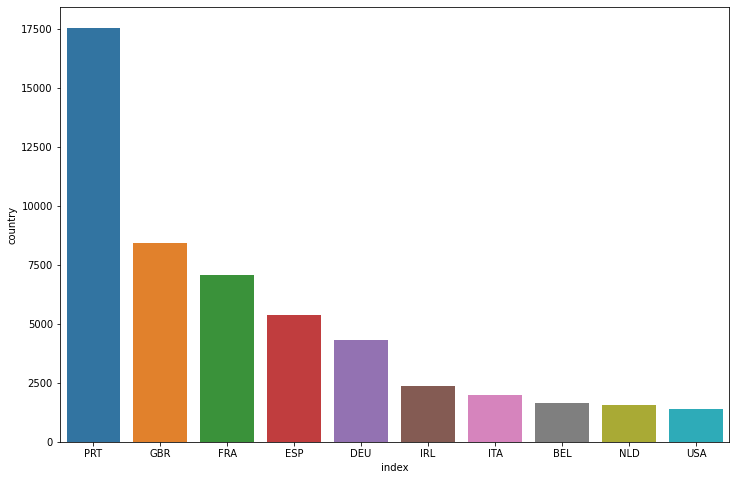

In [ ]:
# bar chart
sns.barplot(country_count_df['index'], country_count_df['country'])

PRT (Portugal), GBR (United Kingdom), FRA (France) and ESP (Spain)
are the top four countries where the booings are maximum.  

# 11)	Try to find out the corelation between several variables using heatmap matrix.

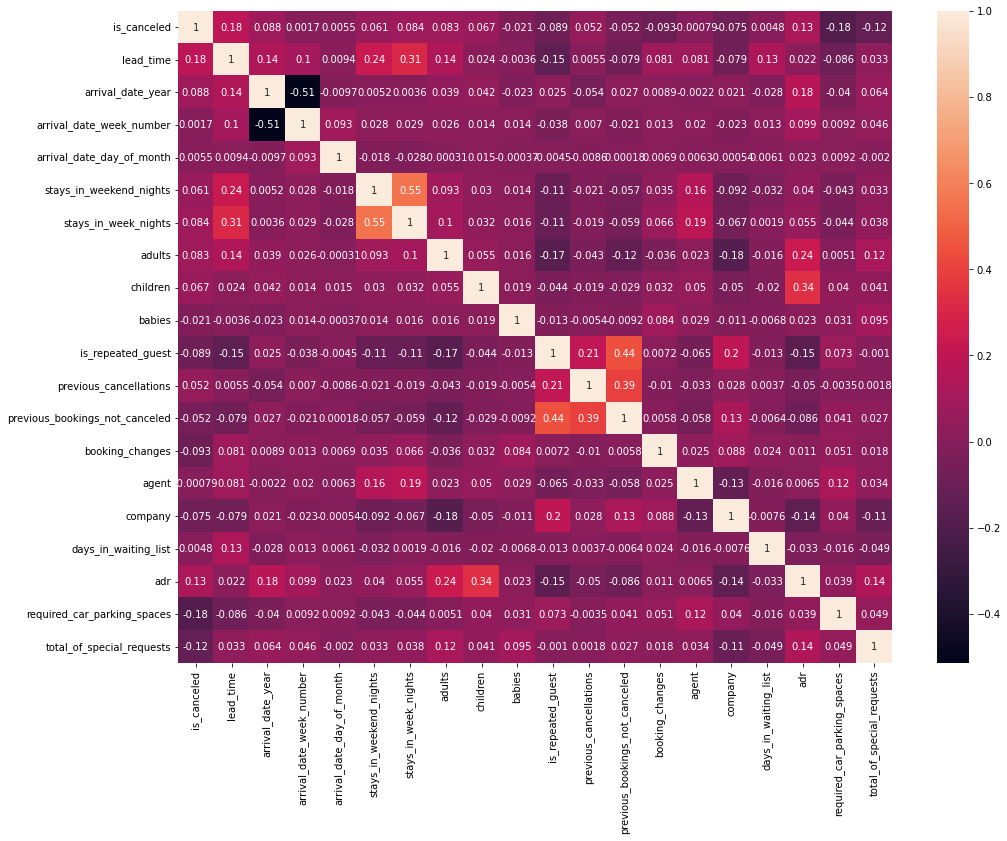

In [ ]:
hotel_data_df = hotel_data_raw
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(16,12))
sns.heatmap(corr_df, annot=True)

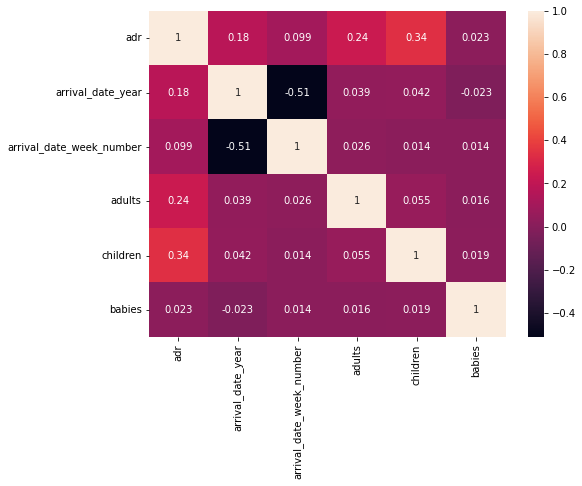

In [ ]:
# To highlight some points some variables are choosen.
hotel_data_df = hotel_data_raw[['adr','arrival_date_year','arrival_date_week_number','adults','children','babies']]
corr_df = hotel_data_df.corr()
corr_df
plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True)

Average daily rate(ADR) is positively correlated to children, adults, and babies with 33%, 25% and 2% respectively. It means that maximum and minimum revenue is generated by occupied rooms with children and babies respectively.

It is observed that arrival_date_week_number and arrival_date_year are 51% negatively cor-related.

# Conclusion